In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

df = pd.read_csv('./bitcoin2000.csv')
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timeUTC
0,1576144800,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14,direct,NaN,2019-12-12 19:00:00
1,1576148400,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79,direct,NaN,2019-12-12 20:00:00
2,1576152000,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97,direct,NaN,2019-12-12 21:00:00
3,1576155600,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38,direct,NaN,2019-12-12 22:00:00
4,1576159200,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50,direct,NaN,2019-12-12 23:00:00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 10 columns):
time                10005 non-null int64
high                10005 non-null float64
low                 10005 non-null float64
open                10005 non-null float64
volumefrom          10005 non-null float64
volumeto            10005 non-null float64
close               10005 non-null float64
conversionType      10005 non-null object
conversionSymbol    13 non-null object
timeUTC             10005 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 781.8+ KB


In [17]:

data_start_date = df.timeUTC.iloc[1]
data_end_date = df.timeUTC.iloc[-1]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 2019-12-12 20:00:00 to 2021-02-01 15:00:00


In [20]:
df.columns[1:8]

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'conversionType'],
      dtype='object')

In [22]:
def plot_random_series(df, n_series):
    
    #sample = df.sample(n_series, random_state=8)
    page_labels = df.columns[1:8].tolist()
    series_samples = df.loc[data_start_date:data_end_date,:1:8]
    
    plt.figure(figsize=(10,6))
    
    for i in range(series_samples.shape[0]):
        np.log1p(pd.Series(series_samples.iloc[i]).astype(np.float64)).plot(linewidth=1.5)
    
    plt.title('Randomly Selected Wikipedia Page Daily Views Over Time (Log(views) + 1)')
    plt.legend(page_labels)
    
plot_random_series(df, 6)

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [1] of <class 'int'>

In [7]:
sample = df.sample(6, random_state=8)
page_labels = sample.columns[1:8].tolist()

In [12]:
sample

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timeUTC
5745,1596826800,11531.02,11472.67,11491.60,2997.04,34518068.76,11507.60,direct,NaN,2020-08-08 04:00:00
4995,1594126800,9273.29,9242.44,9270.40,1263.70,11695251.28,9260.97,direct,NaN,2020-07-07 22:00:00
3374,1588291200,8738.23,8631.39,8637.56,2770.92,24069215.48,8713.90,direct,NaN,2020-05-01 09:00:00
676,1578578400,7915.90,7874.82,7895.97,1262.48,9969539.37,7885.17,direct,NaN,2020-01-09 23:00:00
5603,1596315600,11874.77,11760.27,11841.72,1977.57,23382083.61,11772.13,direct,NaN,2020-08-02 06:00:00
932,1579500000,8672.42,8656.38,8664.46,405.75,3524123.16,8670.77,direct,NaN,2020-01-20 15:00:00


In [11]:
series_samples = sample.loc[data_start_date:data_end_date,:]

KeyError: '2019-12-12 20:00:00'

In [16]:
from datetime import timedelta

pred_steps = 14
pred_length=timedelta(pred_steps)

first_day = pd.to_datetime(data_start_date) 
last_day = pd.to_datetime(data_end_date)

val_pred_start = last_day - pred_length + timedelta(1)
val_pred_end = last_day

train_pred_start = val_pred_start - pred_length
train_pred_end = val_pred_start - timedelta(days=1)

In [17]:
enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - timedelta(1)

val_enc_start = train_enc_start + pred_length
val_enc_end = val_enc_start + enc_length - timedelta(1)

In [18]:
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

print('\nEncoding interval:', enc_length.days)
print('Prediction interval:', pred_length.days)

Train encoding: 2019-12-12 20:00:00 - 2021-01-04 15:00:00
Train prediction: 2021-01-05 15:00:00 - 2021-01-18 15:00:00 

Val encoding: 2019-12-26 20:00:00 - 2021-01-18 15:00:00
Val prediction: 2021-01-19 15:00:00 - 2021-02-01 15:00:00

Encoding interval: 389
Prediction interval: 14


In [35]:
df[df.columns[1:9]]

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,7219.93,7149.15,7170.18,1536.79,11041994.81,7166.14,direct,NaN
1,7208.36,7166.03,7166.14,785.11,5654607.43,7199.79,direct,NaN
2,7222.43,7194.87,7199.79,672.46,4855213.22,7199.97,direct,NaN
3,7211.80,7187.29,7199.97,807.61,5821087.81,7201.38,direct,NaN
4,7229.22,7152.84,7201.38,1606.06,11537799.57,7173.50,direct,NaN
...,...,...,...,...,...,...,...,...
10000,33847.46,33257.39,33450.01,2066.49,69445570.35,33675.45,direct,NaN
10001,33779.76,33505.50,33675.45,1173.82,39473368.04,33590.20,direct,NaN
10002,33945.41,33404.87,33590.20,1430.06,48159838.72,33576.82,direct,NaN
10003,33907.89,33467.87,33576.82,1198.20,40319458.23,33803.02,direct,NaN


In [40]:
df.timeUTC.iloc[1:]

1        2019-12-12 20:00:00
2        2019-12-12 21:00:00
3        2019-12-12 22:00:00
4        2019-12-12 23:00:00
5        2019-12-13 00:00:00
                ...         
10000    2021-02-01 11:00:00
10001    2021-02-01 12:00:00
10002    2021-02-01 13:00:00
10003    2021-02-01 14:00:00
10004    2021-02-01 15:00:00
Name: timeUTC, Length: 10004, dtype: object

In [56]:
df.loc[:,['close']].T

,0,1,2,3,4,5,6,7,8,9,...,9995,9996,9997,9998,9999,10000,10001,10002,10003,10004
close,7166.14,7199.79,7199.97,7201.38,7173.5,7202.12,7212.33,7213.47,7224.86,7218.46,...,32603.45,33012.66,33143.22,32584.49,33450.01,33675.45,33590.2,33576.82,33803.02,33897.06


In [57]:
date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in df.timeUTC.iloc[1:]]),
                          data=[i for i in range(len(df.timeUTC.iloc[1:]))])

series_array = df.loc[:,['close']].T.values

def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

In [58]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam

latent_dim = 50 # LSTM hidden units
dropout = .20 

# Define an input series and encode it with an LSTM. 
encoder_inputs = Input(shape=(None, 1)) 
encoder = LSTM(latent_dim, dropout=dropout, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the final states. These represent the "context"
# vector that we use as the basis for decoding.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
# This is where teacher forcing inputs are fed in.
decoder_inputs = Input(shape=(None, 1)) 

# We set up our decoder using `encoder_states` as initial state.  
# We return full output sequences and return internal states as well. 
# We don't use the return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, dropout=dropout, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)

decoder_dense = Dense(1) # 1 continuous output at each timestep
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [59]:
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
lstm_8 (LSTM)                   [(None, 50), (None,  10400       input_9[0][0]                    
__________________________________________________________________________________________________
lstm_9 (LSTM)                   [(None, None, 50), ( 10400       input_10[0][0]                   
                                                                 lstm_8[0][1]               

In [72]:
first_n_samples = 10000
batch_size = 100
epochs = 100

# sample of series from train_enc_start to train_enc_end  
encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                           train_enc_start, train_enc_end)[:first_n_samples]
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                            train_pred_start, train_pred_end)[:first_n_samples]
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

# lagged target series for teacher forcing
decoder_input_data = np.zeros(decoder_target_data.shape)
decoder_input_data[:,1:,0] = decoder_target_data[:,:-1,0]
decoder_input_data[:,0,0] = encoder_input_data[:,-1,0]

model.compile(Adam(), loss='mean_absolute_error')


In [73]:
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,batch_size=batch_size,epochs=epochs)

Epoch 1/100


UnboundLocalError: local variable 'logs' referenced before assignment

KeyError: 'val_loss'

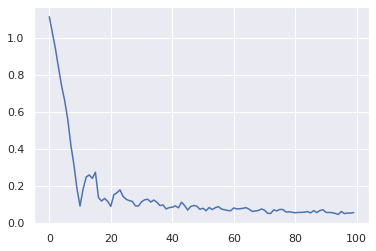

In [70]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [74]:
# from our previous model - mapping encoder sequence to state vectors
encoder_model = Model(encoder_inputs, encoder_states)

# A modified version of the decoding stage that takes in predicted target inputs
# and encoded state vectors, returning predicted target outputs and decoder state vectors.
# We need to hang onto these state vectors to run the next step of the inference loop.
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]

decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                      [decoder_outputs] + decoder_states)

def decode_sequence(input_seq):
    
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, 1))
    
    # Populate the first target sequence with end of encoding series pageviews
    target_seq[0, 0, 0] = input_seq[0, -1, 0]

    # Sampling loop for a batch of sequences - we will fill decoded_seq with predictions
    # (to simplify, here we assume a batch of size 1).

    decoded_seq = np.zeros((1,pred_steps,1))
    
    for i in range(pred_steps):
        
        output, h, c = decoder_model.predict([target_seq] + states_value)
        
        decoded_seq[0,i,0] = output[0,0,0]

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, 1))
        target_seq[0, 0, 0] = output[0,0,0]

        # Update states
        states_value = [h, c]

    return decoded_seq

In [75]:

encoder_input_data = get_time_block_series(series_array, date_to_index, val_enc_start, val_enc_end)
encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)

decoder_target_data = get_time_block_series(series_array, date_to_index, val_pred_start, val_pred_end)
decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)

In [76]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=50):

    encode_series = encoder_input_data[sample_ind:sample_ind+1,:,:] 
    pred_series = decode_sequence(encode_series)
    
    encode_series = encode_series.reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)   
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    
    plt.figure(figsize=(10,6))   
    
    plt.plot(range(1,x_encode+1),encode_series_tail)
    plt.plot(range(x_encode,x_encode+pred_steps),target_series,color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),pred_series,color='teal',linestyle='--')
    
    plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % enc_tail_len)
    plt.legend(['Encoding Series','Target Series','Predictions'])

In [77]:
predict_and_plot(encoder_input_data, decoder_target_data, 100)


UnboundLocalError: local variable 'batch_outputs' referenced before assignment